**There are 37 category (class) pet dataset with roughly 200 images for each class.** The images have a large variations in scale, pose and lighting. All images have an associated ground truth annotation of breed, head ROI, and pixel level trimap segmentation.

!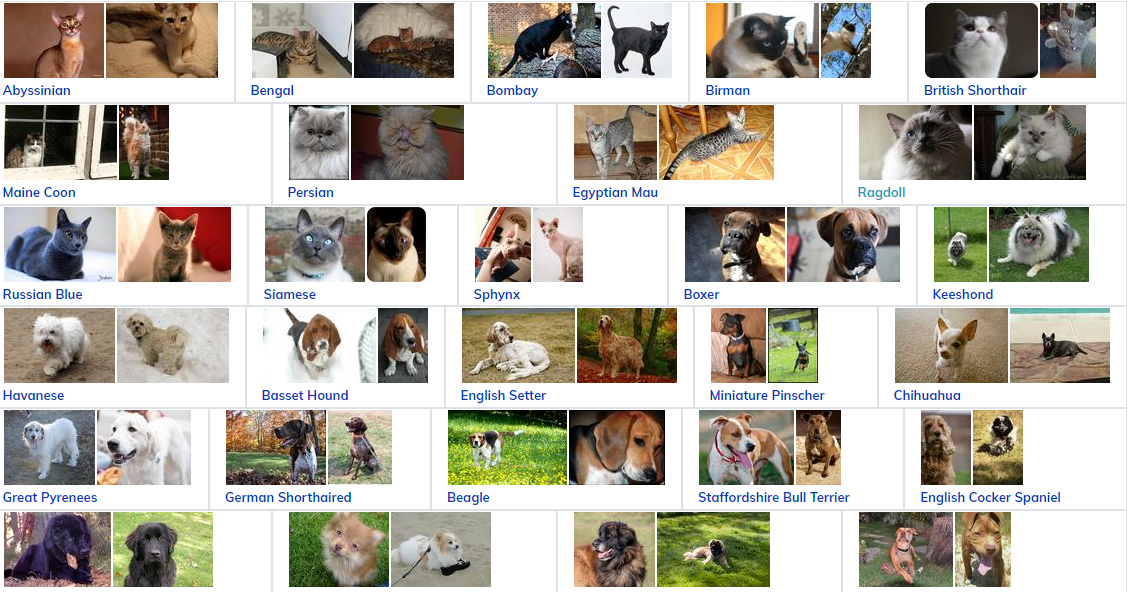

In [ ]:
# Install specific PyTorch and torchvision versions
!pip install torch==1.12.0 torchvision==0.13.0

# Restart runtime to ensure proper installation
import os
os.kill(os.getpid(), 9)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 39.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.4.1+cu121
    Uninstalling torch-2.4.1+cu121:
      Successfully uninstalled torch-2.4.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.19.1+cu121
    Uninstalling torchvision-0.19.1+cu121:
      Successfully uninstalled torchvision-0.19.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.4.1+cu121 requires torch==2.4.1, but you have torch 1.12.0 which is incompatible.


In [ ]:
# # For zip file on local machine
# from google.colab import files
# import zipfile
# import os

# # Upload files
# uploaded = files.upload()

# # The files will be uploaded into the current directory.
# # If it's a zip file, you can unzip it
# for filename in uploaded.keys():
#     if filename.endswith(".zip"):
#         with zipfile.ZipFile(filename, 'r') as zip_ref:
#             zip_ref.extractall("./data")
#             print(f"Dataset extracted to ./data")


In [ ]:
# # for .tar.gz file on local machine
# from google.colab import files
# import tarfile
# import os

# # Upload files
# uploaded = files.upload()

# # The files will be uploaded into the current directory.
# # If it's a tar.gz file, you can extract it
# for filename in uploaded.keys():
#     if filename.endswith(".tar.gz"):
#         with tarfile.open(filename, 'r:gz') as tar_ref:
#             tar_ref.extractall("./data")  # Extract to the "./data" directory
#             print(f"Dataset extracted to ./data")
#     else:
#         print(f"{filename} is not a .tar.gz file. No extraction performed.")


** To use shareable link of file from google drive**
If the link is "https://drive.google.com/file/d/1cnUI_mHLX6LPxreiuMVX33okXevXedKU/view?usp=drive_link
"
To download it directly, replace the part before /d/ with:
"https://drive.google.com/uc?export=download&id="

And extract the file ID (1cnUI_mHLX6LPxreiuMVX33okXevXedKU) from the original link.

So the final direct download link becomes:

"https://drive.google.com/uc?export=download&id=1cnUI_mHLX6LPxreiuMVX33okXevXedKU
"

** Make sure there is no restriction on the file**


In [1]:
import gdown
import tarfile
import os

# Step 1: Download the file from Google Drive
file_url = 'https://drive.google.com/uc?export=download&id=1cnUI_mHLX6LPxreiuMVX33okXevXedKU'
output_file = 'dataset.tar.gz'  # Name for the downloaded file

# Download the file using gdown
gdown.download(file_url, output_file, quiet=False)

# Step 2: Extract the tar.gz file
if output_file.endswith("tar.gz"):
    print(f"Extracting {output_file}...")
    with tarfile.open(output_file, "r:gz") as tar:
        tar.extractall(path="./data")  # Extract to ./data folder
    print(f"Dataset extracted to ./data")

# Check the extracted folder
print("Extracted files:", os.listdir("./data"))

# Define the path where data is extracted
data_path = "./data"

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1cnUI_mHLX6LPxreiuMVX33okXevXedKU
From (redirected): https://drive.google.com/uc?export=download&id=1cnUI_mHLX6LPxreiuMVX33okXevXedKU&confirm=t&uuid=737d94fe-e11a-4484-b80e-d36ac6b8309a
To: /content/dataset.tar.gz
100%|██████████| 792M/792M [00:03<00:00, 256MB/s]


Extracting dataset.tar.gz...
Dataset extracted to ./data
Extracted files: ['images']


In [13]:
# Step 3: Specify the classes you want to sample from
selected_classes = ['boxer', 'pug', 'Sphynx']  # Replace with actual class names
selected_classes = [cls.lower() for cls in selected_classes]  # Convert to lowercase for case-insensitive matching


In [14]:
# Step 4: Get all files from the selected classes
data_path = './data'
all_files_by_class = {cls: [] for cls in selected_classes}

# Iterate through all files in the data directory
for root, dirs, files in os.walk(data_path):
    for file in files:
        # Extract the class name from the filename (assuming format: className_XXX.jpg)
        class_name = file.split('_')[0].lower()  # Get the class name and convert to lowercase

        # Check if this cleaned class name is in our selected classes
        if class_name in selected_classes:
            all_files_by_class[class_name].append(os.path.join(root, file))

# Debugging: Print the total files found for each selected class
for class_name, files in all_files_by_class.items():
    print(f"Class '{class_name}' - Total files found: {len(files)}")


Class 'boxer' - Total files found: 200
Class 'pug' - Total files found: 200
Class 'sphynx' - Total files found: 200


In [22]:
# Step 5: Sample 10% of the files for each class
sample_percentage = 0.5  # 50%
sampled_files_by_class = {}

for class_name, files in all_files_by_class.items():
    sample_size = max(1, int(len(files) * sample_percentage))  # Ensure at least one file is sampled
    sampled_files_by_class[class_name] = random.sample(files, sample_size)

# Check how many files we have for each class
for class_name, sampled_files in sampled_files_by_class.items():
    print(f"Class '{class_name}' - Sampled 50%: {len(sampled_files)}")


Class 'boxer' - Sampled 50%: 100
Class 'pug' - Sampled 50%: 100
Class 'sphynx' - Sampled 50%: 100


In [23]:
# Step 6: Split the sampled files of each class into 80% training and 20% testing
train_percentage = 0.8

train_files = []
test_files = []

for class_name, sampled_files in sampled_files_by_class.items():
    train_size = int(len(sampled_files) * train_percentage)

    # Check the number of train and test files for each class
    print(f"Class '{class_name}' - Training size: {train_size}, Testing size: {len(sampled_files) - train_size}")

    train_files.extend(sampled_files[:train_size])
    test_files.extend(sampled_files[train_size:])

print(f"Number of training files (80% of 50%): {len(train_files)}")
print(f"Number of testing files (20% of 50%): {len(test_files)}")

Class 'boxer' - Training size: 80, Testing size: 20
Class 'pug' - Training size: 80, Testing size: 20
Class 'sphynx' - Training size: 80, Testing size: 20
Number of training files (80% of 10%): 240
Number of testing files (20% of 10%): 60


In [25]:
# Step 7: Create directories for train and test data

import shutil

train_dir = './data/train'
test_dir = './data/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Move the training files
for file in train_files:
    class_name = file.split('_')[0].lower()  # Get the class name from the filename
    dest_path = os.path.join(train_dir, class_name, os.path.basename(file))

    # Create directories if they don't exist
    os.makedirs(os.path.dirname(dest_path), exist_ok=True)

    # Move file
    shutil.move(file, dest_path)

# Move the testing files
for file in test_files:
    class_name = file.split('_')[0].lower()  # Get the class name from the filename
    dest_path = os.path.join(test_dir, class_name, os.path.basename(file))

    # Create directories if they don't exist
    os.makedirs(os.path.dirname(dest_path), exist_ok=True)

    # Move file
    shutil.move(file, dest_path)

print("Files have been split into training and testing datasets.")

Files have been split into training and testing datasets.


### Compress to download test and train files locally

In [26]:
# Step 8: Compress to download train and test sets locally
shutil.make_archive("train_data", 'zip', './data/train')
shutil.make_archive("test_data", 'zip', './data/test')


'/content/test_data.zip'

#### Download the ZIP files to local machine

In [27]:
from google.colab import files

# Download the train_data.zip
files.download("train_data.zip")

# Download the test_data.zip
files.download("test_data.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>